In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import sklearn


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor


In [6]:
xigua = pd.read_csv("../data/xigua3.0.csv", index_col='编号')
xigua

,色泽,根蒂,敲声,纹理,脐部,触感,密度,含糖率,好瓜
编号,,,,,,,,,
1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,0.697,0.460,是
2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,0.774,0.376,是
3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,0.634,0.264,是
4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,0.608,0.318,是
5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,0.556,0.215,是
6,青绿,稍蜷,浊响,清晰,稍凹,软粘,0.403,0.237,是
7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,0.481,0.149,是
8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,0.437,0.211,是
9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,0.666,0.091,否


In [18]:
xigua.columns

Index(['色泽', '根蒂', '敲声', '纹理', '脐部', '触感', '密度', '含糖率', '好瓜'], dtype='object')

In [20]:
xigua_ls = xigua[['色泽', '根蒂', '敲声', '纹理', '脐部', '触感','好瓜']]
xigua_lx = xigua[['密度','含糖率']]
xigua_lx

,密度,含糖率
编号,,
1,0.697,0.460
2,0.774,0.376
3,0.634,0.264
4,0.608,0.318
5,0.556,0.215
6,0.403,0.237
7,0.481,0.149
8,0.437,0.211
9,0.666,0.091


In [33]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
xigua_ls_enc = encoder.fit_transform(xigua_ls)
xigua_ls_enc_2 = pd.DataFrame(xigua_ls_enc)
xigua_ls_enc_2.index += 1

xigua_1 = pd.concat([xigua_lx, xigua_ls_enc_2], axis=1)
xigua_1.columns = range(len(xigua_1.columns))
xigua_1

,0,1,2,3,4,5,6,7,8
1,0.697,0.460,2.0,2.0,1.0,1.0,0.0,0.0,1.0
2,0.774,0.376,0.0,2.0,0.0,1.0,0.0,0.0,1.0
3,0.634,0.264,0.0,2.0,1.0,1.0,0.0,0.0,1.0
4,0.608,0.318,2.0,2.0,0.0,1.0,0.0,0.0,1.0
5,0.556,0.215,1.0,2.0,1.0,1.0,0.0,0.0,1.0
6,0.403,0.237,2.0,1.0,1.0,1.0,2.0,1.0,1.0
7,0.481,0.149,0.0,1.0,1.0,2.0,2.0,1.0,1.0
8,0.437,0.211,0.0,1.0,1.0,1.0,2.0,0.0,1.0
9,0.666,0.091,0.0,1.0,0.0,2.0,2.0,0.0,0.0
10,0.243,0.267,2.0,0.0,2.0,1.0,1.0,1.0,0.0


In [34]:
xigua_x = xigua_1.iloc[:,:-1]
xigua_y = xigua_1.iloc[:,-1]
xigua_x

,0,1,2,3,4,5,6,7
1,0.697,0.460,2.0,2.0,1.0,1.0,0.0,0.0
2,0.774,0.376,0.0,2.0,0.0,1.0,0.0,0.0
3,0.634,0.264,0.0,2.0,1.0,1.0,0.0,0.0
4,0.608,0.318,2.0,2.0,0.0,1.0,0.0,0.0
5,0.556,0.215,1.0,2.0,1.0,1.0,0.0,0.0
6,0.403,0.237,2.0,1.0,1.0,1.0,2.0,1.0
7,0.481,0.149,0.0,1.0,1.0,2.0,2.0,1.0
8,0.437,0.211,0.0,1.0,1.0,1.0,2.0,0.0
9,0.666,0.091,0.0,1.0,0.0,2.0,2.0,0.0
10,0.243,0.267,2.0,0.0,2.0,1.0,1.0,1.0


In [49]:
xigua_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1 to 17
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       17 non-null     float64
 1   1       17 non-null     float64
 2   2       17 non-null     float64
 3   3       17 non-null     float64
 4   4       17 non-null     float64
 5   5       17 non-null     float64
 6   6       17 non-null     float64
 7   7       17 non-null     float64
dtypes: float64(8)
memory usage: 1.7 KB


In [11]:
pd.get_dummies(xigua_x)

,密度,含糖率,色泽_乌黑,色泽_浅白,色泽_青绿,根蒂_硬挺,根蒂_稍蜷,根蒂_蜷缩,敲声_沉闷,敲声_浊响,敲声_清脆,纹理_模糊,纹理_清晰,纹理_稍糊,脐部_凹陷,脐部_平坦,脐部_稍凹,触感_硬滑,触感_软粘
编号,,,,,,,,,,,,,,,,,,,
1,0.697,0.460,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
2,0.774,0.376,1,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0
3,0.634,0.264,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
4,0.608,0.318,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0
5,0.556,0.215,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0
6,0.403,0.237,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1
7,0.481,0.149,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1
8,0.437,0.211,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
9,0.666,0.091,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,0


In [31]:
model = DecisionTreeClassifier()
model.fit(xigua_x, xigua_y)
model.score(xigua_x, xigua_y)

C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\conda\venv\torch\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


1.0

In [35]:
from sklearn.model_selection import train_test_split
xy = train_test_split(xigua_x, xigua_y)
xy[0].shape,xy[1].shape,xy[2].shape,xy[3].shape

((12, 8), (5, 8), (12,), (5,))

In [39]:
model = DecisionTreeClassifier()
model.fit(xy[0], xy[2])
model.score(xy[1], xy[3])

0.8

In [43]:
import matplotlib.pyplot as plt

[Text(0.5555555555555556, 0.875, '密度 <= 0.204\ngini = 0.498\nsamples = 17\nvalue = [9, 8]'),
 Text(0.3333333333333333, 0.625, '含糖率 <= 0.537\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.2222222222222222, 0.375, '密度 <= 0.124\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.7777777777777778, 0.625, '含糖率 <= 0.382\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]')]

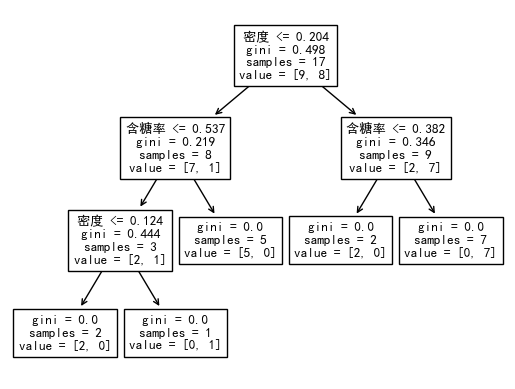

In [57]:
from sklearn.tree import plot_tree
model = DecisionTreeClassifier(criterion='gini')
model.fit(xigua_x[[0,1]], xigua_y)
plt.rcdefaults()
plt.rcParams['font.sans-serif']=['simhei']
plot_tree(model, feature_names=['含糖率','密度'])